# TD 3 : Hopfield model : Berlemont Kevin

## Hopfield network : An introduction

The Hopfield model , consists of a network of $N$ neurons, labeled by a lower index $i$ , with $ 1\leq i\leq N$. Neurons in the Hopfield model have only two states. A neuron $i$ is ‘ON’ if its state variable takes the value $S_{i}=+1$ and ‘OFF’ (silent) if $S_{i}=-1$. The dynamics evolves in discrete time with time steps $\Delta t$. There is no refractoriness and the duration of a time step is typically not specified. If we take $ \Delta t=1ms $, we can interpret $S_{i}(t)=+1$ as an action potential of neuron $i$ at time $t$. If we take $\Delta t=500ms$, $S_{i}(t)=+1$ should rather be interpreted as an episode of high firing rate.

Neurons interact with each other with weights $w_{ij}$. The input potential of neuron $i$, influenced by the activity of other neurons is
$$
h_{i}(t)=\sum_{j}w_{ij}\,S_{j}(t)\,.
$$
The input potential at time t t influences the probabilistic update of the state variable $ S_{i}$ in the next time step:
	
$$
S_{i}(t+\Delta t)=\operatorname{sgn}[h(t)]
$$
If we want now to include some dependancy in the temperature for the dynamic, we can use the Glauber dynamic which is the following. 

If the temperature is not very low, there is a complication in the magnetic problem. Thermal fluctuations tend to flip the spins, from down to up or from up to down, and thus upset the tendency of each spin to align with its field. At high temperature the thermal fluctuations dominate and a spin is nearly as often opposite to its field aligned with it. 
The conventional way to describe mathematically the effect of thermal fluctuations in an Ising model is with Glauber dynamics. We replace the previous deterministic dynamics by a stochastic rule.
$$ 
S_i \equiv \left\lbrace
\begin{array}{cc}
+1  & \mbox{with probability $g(h_i)$} \\
-1 & \mbox{with probability $1-g(h_i)$}
\end{array}\right.
$$
This is taken to be applied whenever spin $S_i$ is updated. The function $g(h)$ depends on temperature and will be :
$$ g(h) = \frac{1}{1+ \exp (- 2 \beta h)}$$


### Patterns in the Hopfield model

The Hopfield model consists of a network of $ N$ binary neurons. A neuron i i is characterized by its state $ S_{i}=\pm 1$. The state variable is updated according to the dynamics defined previously.

The task of the network is to store and recall $ M$ different patterns. Patterns are labeled by the index $\mu$ with $ 1\leq\mu\leq M$. Each pattern $ \mu$ is defined as a desired configuration $ \left\{p_{i}^{\mu}=\pm 1;1\leq i\leq N\right\}$. The network of $ N$ neurons is said to correctly represent pattern $ \mu$, if the state of all neurons $1\leq i\leq N$ is $ S_{i}(t)=S_{i}(t+\Delta t)=p_{i}^{\mu}$. In other words, patterns must be fixed points of the dynamics.

During the set-up phase of the Hopfield network, a random number generator generates, for each pattern $\mu$ a string of $ N $independent binary numbers $ \{p_{i}^{\mu}=\pm 1;1\leq i\leq N\} $with expectation value $ \langle p_{i}^{\mu}\rangle=0$. Strings of different patterns are independent. The weights are chosen as

$$
w_{ij}=c\sum_{\mu=1}^{M}p_{i}^{\mu}\,p_{j}^{\mu}\,
$$
with a positive constant $ c>0$. The network has full connectivity. Note that for a single pattern and $c=1$, the set-ip is identical to the connections of the anti-ferromagnet. For reasons of normalization, the standard choice of the constant $c$ is $ c=1/N$.

In [33]:

%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js"></script>

We will now study how a network stores and retrieves patterns. Using a small network allows us to have a close look at the network weights and dynamics.

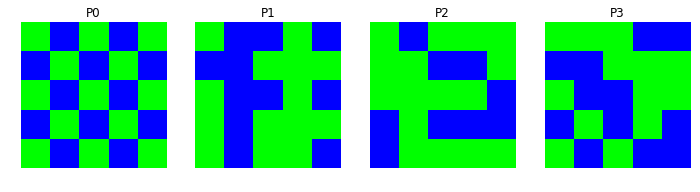

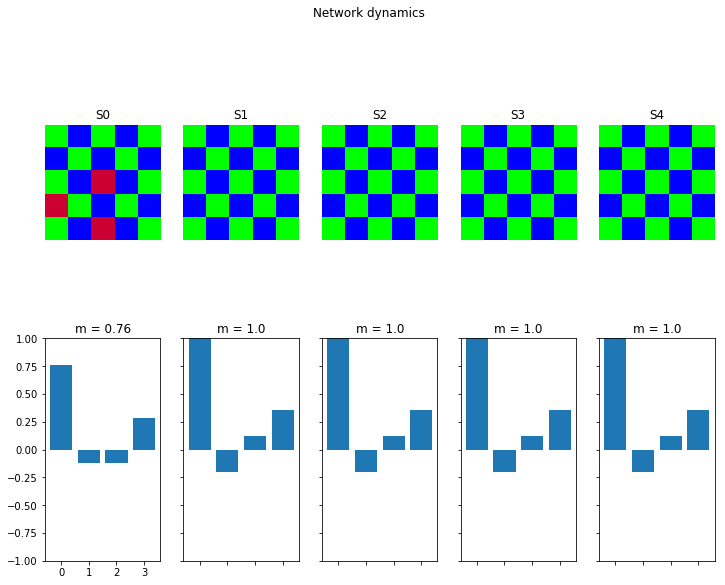

In [5]:
#%matplotlib inline
#%matplotlib qt
import matplotlib.pyplot as plt
from neurodynex.hopfield_network import network, pattern_tools, plot_tools

pattern_size = 5

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
#plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=3)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network

plt.rcParams["figure.figsize"] = [12,9]
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

On this figure we saw that starting with a noisy pattern, the network is capable of finding the right pattern corresponding. We can observe that the correlation $m$ between the right pattern and the output is increasing with time. 

But the thing we can ask is whether the network can retrieve a infinite number of patterns, with a strong noise ? 

The following simulations will give a first answer to this question.

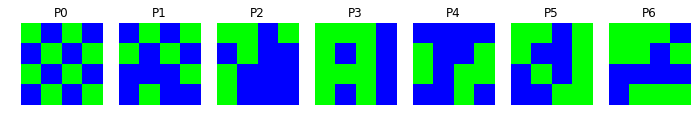

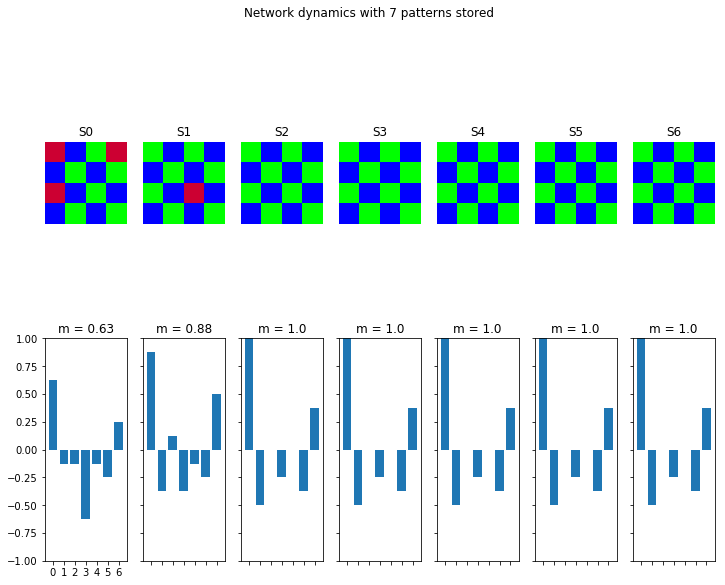

In [7]:
pattern_size = 4
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=6, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
hopfield_net.store_patterns(pattern_list)


# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=3)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=6)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network

plt.rcParams["figure.figsize"] = [12,9]
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics with 7 patterns stored")


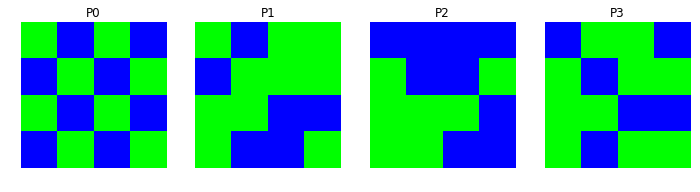

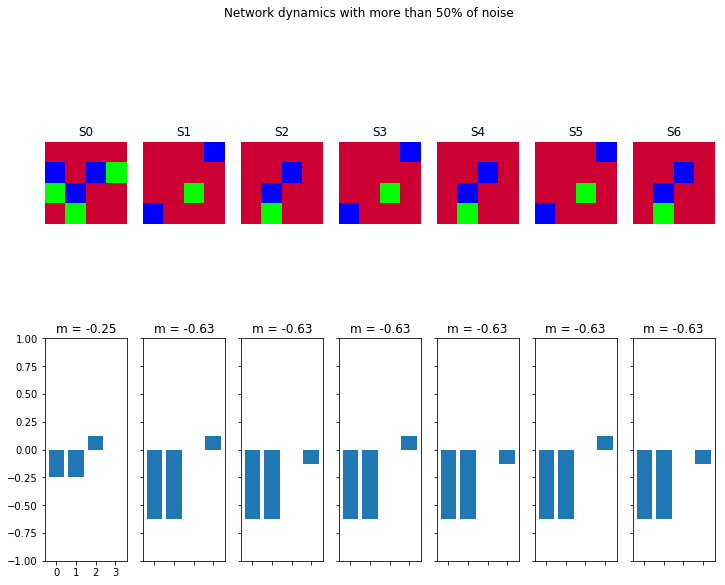

In [10]:
pattern_size = 4
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
hopfield_net.store_patterns(pattern_list)


# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=10)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=6)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network

plt.rcParams["figure.figsize"] = [12,9]
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics with more than 50% of noise")


Those two pictures show the limits of out model. In the situation wherem ore patterns are stored, the netowrk is not able to correctly recover the ones he stored. Moreover, in a situation where he was able to recover the correct pattern, if we increase the noise, the network does not recover the pattern (this seems logical).


### Weights distribution

Let's just have a quick look at the weight's distribution of the Hopfield network before looking at the phase transition. We are going to try to understand how the weights are instancied in the Hopfield network. For that we will create a checkerboard pattern, and a L-pattern and observe the behavior of the system. Each time we will plot the weight matrice and the weight distribution.


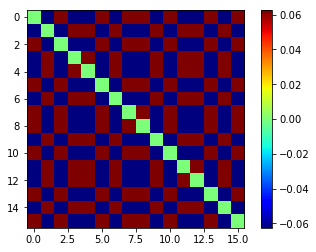

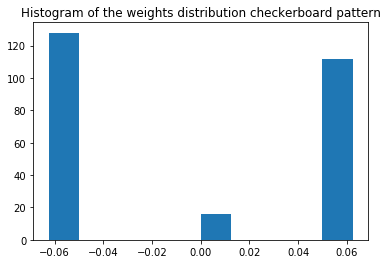

In [19]:
pattern_size = 4

# create an instance of the class HopfieldNetwork
hopfield_net1 = network.HopfieldNetwork(nr_neurons= pattern_size**2)
%matplotlib inline
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]
hopfield_net1.store_patterns(pattern_list)
#plot_tools.plot_pattern_list(pattern_list)
plot_tools.plot_nework_weights(hopfield_net1)
plt.figure()
plt.hist(hopfield_net1.weights.flatten())
plt.title('Histogram of the weights distribution checkerboard pattern')
plt.show()

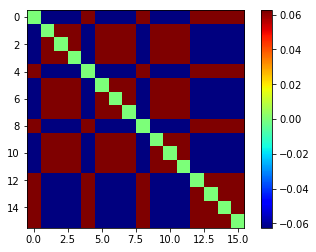

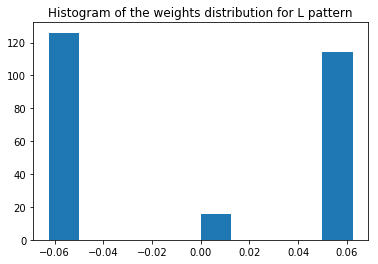

In [20]:
hopfield_net2 = network.HopfieldNetwork(nr_neurons= pattern_size**2)
%matplotlib inline
L_pattern = factory.create_L_pattern()
pattern_list= [L_pattern]
hopfield_net2.store_patterns(pattern_list)
#plot_tools.plot_pattern_list(pattern_list)
plot_tools.plot_nework_weights(hopfield_net2)
plt.figure()
plt.hist(hopfield_net2.weights.flatten())
plt.title('Histogram of the weights distribution for L pattern')
plt.show()

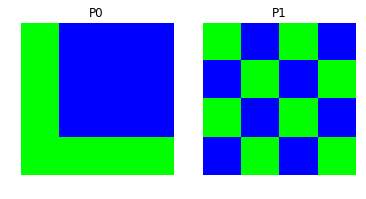

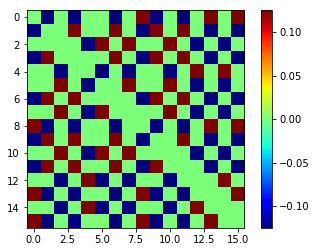

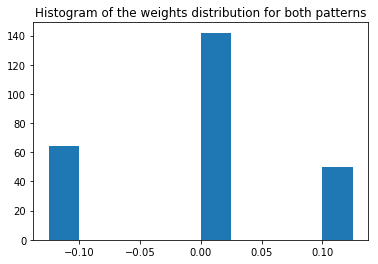

In [21]:
hopfield_net3 = network.HopfieldNetwork(nr_neurons= pattern_size**2)

L_pattern = factory.create_L_pattern()
checkboard = factory.create_checkerboard()
pattern_list= [L_pattern,checkboard]
plot_tools.plot_pattern_list(pattern_list)
hopfield_net3.store_patterns(pattern_list)
plot_tools.plot_nework_weights(hopfield_net3)
plt.figure()
plt.hist(hopfield_net3.weights.flatten())
plt.title('Histogram of the weights distribution for both patterns')
plt.show()

A comaprer avec la somme des deux matrices ! Devrait être identique

On each of this figure we present which patterns are store in the network and the result on the weights. We can observe that the wieght matrice has the same symmetries as the pattern which are storen. Moreover, the weight distribution seems to depend on how many pattern are store. 

When we are trying to store more pattern ,the resulting weight matrice is only the sum of the weight matrices of the individual pattern. This is clearly in accordance with the algotihm we have defined in the introduction. But this influence on the weights distribution highlight the fact that the system can only store a finite number of pattern if he wants to be able to correctly retrieve them. 

## Phase transition

Let us first briefly explain why do we have a phase transition in the dynamics of the Hopfield network. We will highlight this fact with computation at the end of this discussion.



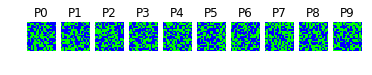

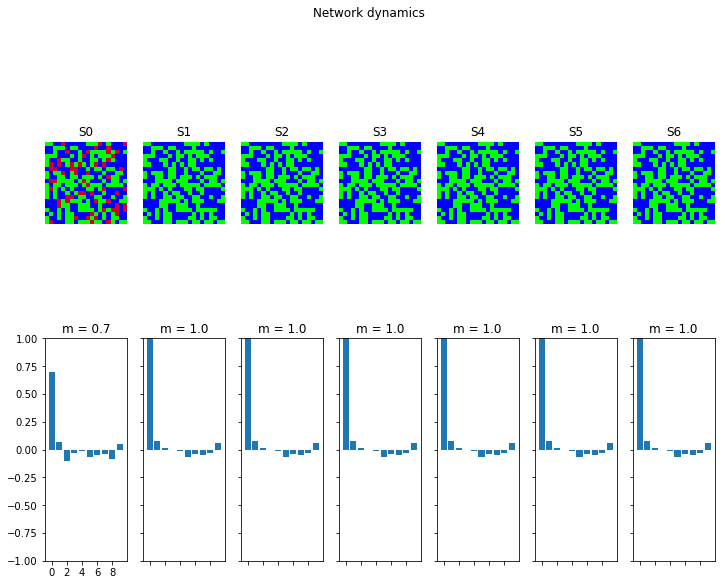

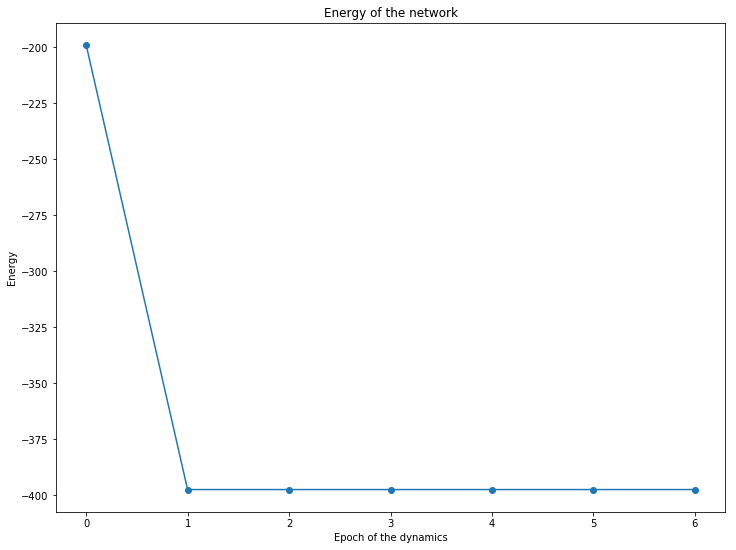

In [24]:
import numpy as np
%matplotlib inline
pattern_size = 20

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
#checkerboard = factory.create_checkerboard()
#pattern_list = [checkerboard]
pattern_list=[]
# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=10, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)


# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state=pattern_tools.flip_n(pattern_list[0],nr_of_flips=60)

hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
#hopfield_net.run(nr_steps=50)
states = hopfield_net.run_with_monitoring(nr_steps=6)

energy_list = []
for p in range(len(states)) :
    
    energy_list.append(- np.sum(np.dot(np.dot(hopfield_net.weights,states[p]),states[p])))

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network

plt.rcParams["figure.figsize"] = [12,9]

plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")


plt.figure()
plt.plot(energy_list,'-o')
plt.title('Energy of the network')
plt.xlabel('Epoch of the dynamics')
plt.ylabel('Energy')
plt.show()

As we can observe as we eprform the dynamics of the Hopfield model, the total energy of the network is strongly decreasing. This is in accordance with the physical interpretation we had. But even if we always have a decreasing energy (even with wrong recovery), we can observe a typical behavior of the magnetization $m$ (or correlation) as function of $p/N$. 

In [28]:
%matplotlib inline
import numpy as np
import time
network_size=20
start_time = time.time()
#alpha_list = [0.01,0.05,0.08,0.10,0.12,0.15,0.20,0.30]
alpha_list = np.arange(0.07,0.22,0.010
                      )
m_list = []
hopfield_net = network.HopfieldNetwork(nr_neurons= network_size**2)
factory = pattern_tools.PatternFactory(network_size,network_size)
# create a checkerboard pattern and add it to the pattern list
#checkerboard = factory.create_checkerboard()
#pattern_list = [checkerboard]
pattern_list=[]
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=int(alpha_list[-1]*network_size*network_size), on_probability=0.5))

for alpha in alpha_list:
 

# create an instance of the class HopfieldNetwork
 


# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
 hopfield_net.store_patterns(pattern_list[0:int(alpha*network_size*network_size)])

# create a noisy version of a pattern and use that to initialize the network
 noisy_init_state=pattern_tools.flip_n(pattern_list[0],nr_of_flips=int(network_size*network_size*0.15)) # 10% of noisy pixels

 hopfield_net.set_state_from_pattern(noisy_init_state)
 states_as_patterns_old =  [noisy_init_state]
 states_as_patterns_new = [pattern_list[0]]
# from this initial state, let the network dynamics evolve.
#hopfield_net.run(nr_steps=50)
 #while pattern_tools.compute_overlap(states_as_patterns_old[0],states_as_patterns_new[0]) < 0.95:
  #print pattern_tools.compute_overlap(states_as_patterns_old[0],states_as_patterns_new[0])
  #states_as_patterns_old = states_as_patterns_new
  #states_new = hopfield_net.run_with_monitoring(nr_steps=1)
  #states_as_patterns_new = factory.reshape_patterns(states_new)
# each network state is a vector. reshape it to the same shape used to create the patterns.
 hopfield_net.run(nr_steps=60)
 states = hopfield_net.run_with_monitoring(nr_steps=1)
 states_as_patterns = factory.reshape_patterns(states)
 m_list.append(pattern_tools.compute_overlap(states_as_patterns[0],pattern_list[0]))
# plot the states of the network
#print("--- %s seconds ---" % (time.time() - start_time))
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Create a trace
trace = go.Scatter(
    x = alpha_list,
    y = m_list,
    mode = 'lines+markers'
)

data = [trace]
layout= go.Layout(
    title= 'Phase transition at T=0',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Alpha',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Correlation',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig= go.Figure(data=data, layout=layout)
py.iplot(fig)

As we have explained with the theory around $\alpha = 0.14$, at temperature $0$ , we should observe a phase transition. And that's exactly what the strong drop in $m$ is telling us. At a precize number of stored patterns the network does not work well anymore. 

To conclude this observation we are going to ocmpute the pahse diagram with Glauber dynamics of the Hopfield network. Each point will be the phase transition in the $(\alpha,T)$ space. 

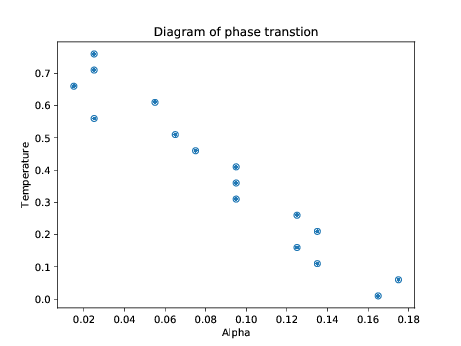

In [2]:
from wand.image import Image as WImage
img = WImage(filename='Phase_transition_with_size25.pdf')
img


This phase diagram shows that there is roughly a triangular region where the network is a good memory device. Outside this region (on the right) the device is not useful as a memory device; $m$ is 0. At the obundary, $m$ jumps discontinuously down to $0$, except on the $T$ axis. There is a critical temperature $T=1$ which sets the limit on the $T$ axis. In the terminology ofp hase transitions, this transition is of first order.  

Like we could have propose, an increase in the Temperature leads to a decrease in the storage capacity. At high temperature it is harder to fix the state of the network.

## Correlated patterns : 

Right now we only have talked about uncorellated patterns. But in reality the patterns we see each day are strongly correlated. Hence we can ask if this algorithm works as well for correlated patterns. 

Let's take the alphabet. We are going to observe the influence of the letter on the dynamics of the network, and on the storage capacity.

the alphabet is stored in an object of type: <type 'dict'>
letters are patterns of size: (10, 10). Create a network of corresponding size


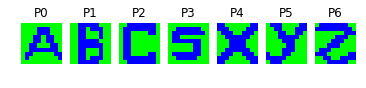

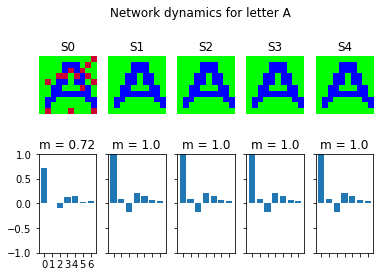

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
from neurodynex.hopfield_network import network, pattern_tools, plot_tools
import numpy

# the letters we want to store in the hopfield network
letter_list = ['A', 'B', 'C', 'S', 'X', 'Y', 'Z']

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)

abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list ]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics for letter A")

Here we have use a list of structured patterns, the letters. Each letter is represented in a 10 by 10 grid. In this example we try to recover the letter $A$ from a noisy pattern. We can observe that $A$ is a stable attractor of the dynamic. Like in the case of uncorellated pattern the system can store the information. However is the network able to store as many information as in the case of uncorellated patterns ? 

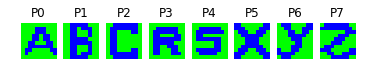

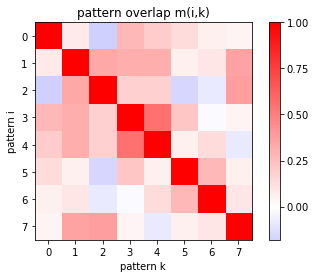

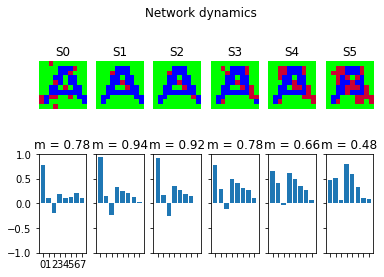

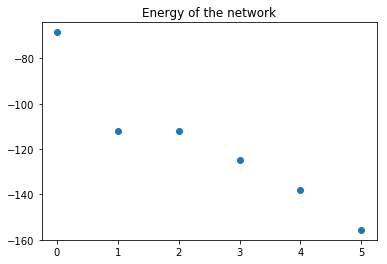

In [32]:
letter_list = ['A', 'B', 'C', 'R','S', 'X', 'Y', 'Z']
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])
pattern_list = [abc_dictionary[key] for key in letter_list ]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)
hopfield_net.set_state_from_pattern(noisy_init_state)
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)
# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=5)
energy_list = []
for p in range(len(states)) :
    
    energy_list.append(- np.sum(np.dot(np.dot(hopfield_net.weights,states[p]),states[p])))
# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

plt.figure()
plt.plot(energy_list,'o')
plt.title('Energy of the network')

This results are singular. Despite the fact that we are under the critical capacity, our system isn ot able to fully recover the letter $A$ when we store the letter $R$. Even if there is minimization of the energy, the fixed point has become unstable. 

This highlights the fact that with real patterns the correlations are important and the storage capacity strongly depends on the pattern we are trying to learn, and is smaller that for uncorellated patterns.

